# ***BUSINESS ANALYSIS PROJECT***

---



# **IMPORTING LIBRARIES**

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **DATA ANALYSIS AND CLEANING**

*GENERAL ANALYSIS OF DATA*

In [214]:
df = pd.read_csv("ecommerce_sales_dirty.csv")
print(f"your rows are {df.shape[0]}, your columns are {df.shape[1]}")
df.head()

your rows are 100, your columns are 6


,Order_ID,Product,Category,Quantity,Price_per_Unit,Total_Sale
0,1,NaN,NaN,2.0,NaN,2892.0
1,2,Laptop,Accessories,4.0,693.0,2772.0
2,3,Headphones,Electronics,7.0,1626.0,11382.0
3,4,Smartphone,Accessories,6.0,63.0,378.0
4,5,Smartphone,Accessories,9.0,1097.0,9873.0


*GATHERING INFORMATION OF THE DATASET(COLUMNS, NON-NULL COUNT, DATA TYPES)*

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        100 non-null    int64  
 1   Product         90 non-null     object 
 2   Category        88 non-null     object 
 3   Quantity        92 non-null     float64
 4   Price_per_Unit  90 non-null     float64
 5   Total_Sale      90 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ KB


*FINDING NULL VALUES*

In [216]:
df.isnull().sum()

,0
Order_ID,0
Product,10
Category,12
Quantity,8
Price_per_Unit,10
Total_Sale,10


*CHECKING FOR CORRECT CATEGORY-PRODUCT MAPPING*

In [217]:
df[["Product", "Category"]].drop_duplicates()

,Product,Category
0,NaN,NaN
1,Laptop,Accessories
2,Headphones,Electronics
3,Smartphone,Accessories
5,Tablet,Electronics
8,Smartphone,Electronics
12,Tablet,Accessories
14,Headphones,Accessories
15,Laptop,Electronics
18,Tablet,NaN


During data validation, it was observed that certain products (e.g., Headphones, Tablet) were assigned to multiple categories.
To ensure consistency and avoid double-counting in category-level analysis, a single standardized category was assigned to each product using a mapping-based approach.

---



*FIXING CATEGORY-PRODUCT MAPPING CONSTRAINTS*

In [218]:
category_mode = df.groupby("Product")["Category"].apply(lambda x: x.mode()[0])
df["Category"] = df["Product"].map(category_mode)
#df["Category"] = category_mode

df[["Product", "Category"]].drop_duplicates()

,Product,Category
0,NaN,NaN
1,Laptop,Accessories
2,Headphones,Accessories
3,Smartphone,Electronics
5,Tablet,Electronics


All product–category mappings are now unique, ensuring consistent and reliable data integrity.

---



*FILLING NULL VALUES*

In [219]:
df["Product"].fillna("Unknown", inplace = True)
df["Category"].fillna("Unknown", inplace = True)
df["Quantity"].fillna(df["Quantity"].median(), inplace = True)
df["Price_per_Unit"] = df["Price_per_Unit"].fillna(df["Price_per_Unit"].median())
df["Total_Sale"] = df["Quantity"]* df["Price_per_Unit"]

*ANALYSIS AFTER FILLING NULL VALUES*

In [220]:
df.head()

,Order_ID,Product,Category,Quantity,Price_per_Unit,Total_Sale
0,1,Unknown,Unknown,2.0,1096.5,2193.0
1,2,Laptop,Accessories,4.0,693.0,2772.0
2,3,Headphones,Accessories,7.0,1626.0,11382.0
3,4,Smartphone,Electronics,6.0,63.0,378.0
4,5,Smartphone,Electronics,9.0,1097.0,9873.0


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        100 non-null    int64  
 1   Product         100 non-null    object 
 2   Category        100 non-null    object 
 3   Quantity        100 non-null    float64
 4   Price_per_Unit  100 non-null    float64
 5   Total_Sale      100 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ KB


Now no null values and incorrect Category for Products exist. The data is now consistent, reliable and data integrity is properly maintained.

---



# **CATEGORY LEVEL SALES PERFORMANCE**

*AVERAGE PRICE OF ITEMS FROM EACH CATEGORY*

In [222]:
df.groupby("Category")["Price_per_Unit"].mean()

,Price_per_Unit
Category,
Accessories,1097.780
Electronics,981.825
Unknown,1096.500


*TOTAL QUANTITY OF ITEMS SOLD FROM EACH CATEGORY*

In [223]:
df.groupby("Category")["Quantity"].sum()

,Quantity
Category,
Accessories,245.0
Electronics,176.0
Unknown,50.0


*TOTAL SALES GENERATED FROM EACH CATEGORY*

In [224]:
df.groupby("Category")["Total_Sale"].sum()

,Total_Sale
Category,
Accessories,281076.0
Electronics,175914.0
Unknown,54825.0


*VISUAL REPRESENTATION*

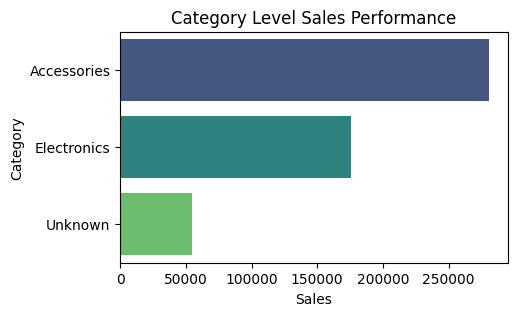

In [225]:
plt.figure(figsize=(5, 3))
salebycat = df.groupby("Category")["Total_Sale"].sum()
salebycat
sns.barplot(y = salebycat.index, x = salebycat.values, palette= "viridis")
plt.title("Category Level Sales Performance")
plt.xlabel("Sales")
plt.ylabel("Category")
plt.show()

The plot clearly visualises the sales performance of each Category

---



# **PRODUCT LEVEL SALES ANALYSIS**

*TOTAL QUANTITY OF EACH PRODUCT SOLD*

In [226]:
df.groupby("Product")["Quantity"].sum()

,Quantity
Product,
Headphones,121.0
Laptop,124.0
Smartphone,86.0
Tablet,90.0
Unknown,50.0


*TOTAL SALES GENERATED BY EACH PRODUCT*

In [227]:
salebyprod = df.groupby("Product")["Total_Sale"].sum()
salebyprod

,Total_Sale
Product,
Headphones,140450.0
Laptop,140626.0
Smartphone,68541.0
Tablet,107373.0
Unknown,54825.0


*VISUAL REPRESENTATION*

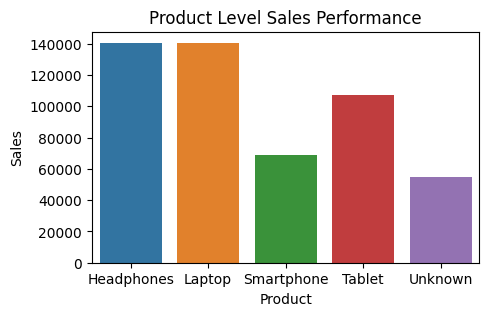

In [228]:
plt.figure(figsize=(5, 3))
sns.barplot(x = salebyprod.index, y = salebyprod.values, palette= "tab10")
plt.title("Product Level Sales Performance")
plt.ylabel("Sales")
plt.xlabel("Product")
plt.show()

The plot clearly visualises the sales performance of each Product

---



# **CORRELATION BETWEEN ENTITIES OF THE DATASET**

In [229]:
df.drop(columns=["Order_ID"]).corr(numeric_only = True)

,Quantity,Price_per_Unit,Total_Sale
Quantity,1.000000,0.109860,0.747035
Price_per_Unit,0.109860,1.000000,0.632662
Total_Sale,0.747035,0.632662,1.000000


Total_Sale shows high correlation with Quantity than Price_per_Unit

---



*VISUAL REPRESENTATION*

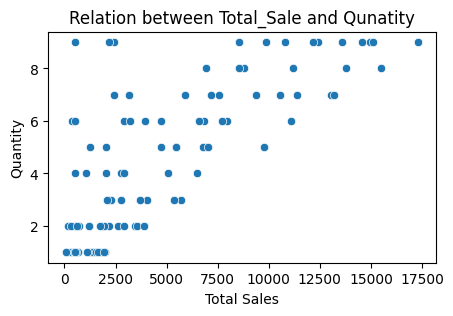

In [230]:
plt.figure(figsize = (5, 3))
sns.scatterplot(x = df["Total_Sale"], y = df["Quantity"])
plt.title("Relation between Total_Sale and Qunatity")
plt.xlabel("Total Sales")
plt.ylabel("Quantity")
plt.show()

1. The plot clearly visualizes when the Quantity of a product increases in any order the sale generated through that order is also high.

2. The relation between Sales and Quantity is very Strong and positive.

3. When Quantity is 1–2, Total Sales are mostly low, with little spread.

4. For quantities 7–9, Total Sales range much higher, reflecting price variation across products.

---



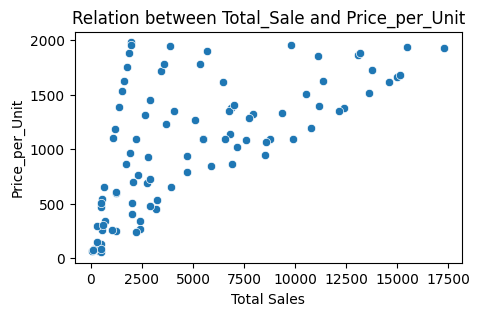

In [231]:
plt.figure(figsize = (5, 3))
sns.scatterplot(x = df["Total_Sale"], y = df["Price_per_Unit"])
plt.title("Relation between Total_Sale and Price_per_Unit")
plt.xlabel("Total Sales")
plt.ylabel("Price_per_Unit")
plt.show()

1. The plot clearly shows that orders with higher Price per Unit generally generate higher Total Sales.

2. The relationship between Total Sales and Price per Unit is moderately strong and positive.

3. When Price per Unit is low (around 0–500), Total Sales are mostly low to medium, even when sales occur frequently.

4. For higher Price per Unit values (above 1500), Total Sales tend to be significantly higher, indicating that expensive products contribute more to revenue even with fewer units sold.

5. The wide spread at lower Total Sales indicates that low revenue can come from both low-priced and high-priced products, depending on quantity.

---



# **REVENUE CONTRIBUTION ANALYSIS**

*PRODUCTS AND THEIR CATEGORIES*

In [232]:
df[["Product", "Category"]].drop_duplicates()

,Product,Category
0,Unknown,Unknown
1,Laptop,Accessories
2,Headphones,Accessories
3,Smartphone,Electronics
5,Tablet,Electronics


*REVENUE ANALYSIS BASED ON CATEGORY*

In [233]:
df.head()
cat_sale = df.groupby("Category")["Total_Sale"].sum()
cat_sale.sort_values(ascending = False)

,Total_Sale
Category,
Accessories,281076.0
Electronics,175914.0
Unknown,54825.0


Accessories gives the highest sales while the Unknown category gives the least amount of sales

---



*VISUAL REPRESENTATION*

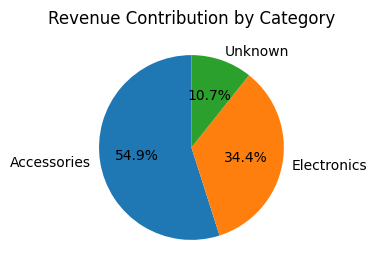

In [234]:
plt.figure(figsize = (5, 3))
plt.pie(cat_sale, labels=cat_sale.index, autopct="%1.1f%%", startangle=90)
plt.title("Revenue Contribution by Category")
plt.show()

"Accessories" category had the highest contribution in generating the completer revenue followed by "Electronics" which performed decent and the category "Unknown" had the least impact on total revenue.

---



*REVENUE ANALYSIS BASED ON PRODUCT*

In [235]:
prod_sale = df.groupby("Product")["Total_Sale"].sum()
prod_sale.sort_values(ascending = False)

,Total_Sale
Product,
Laptop,140626.0
Headphones,140450.0
Tablet,107373.0
Smartphone,68541.0
Unknown,54825.0


Laptop gives the most amount of sales while the Unknown product gives
the least amount of sales

---



*VISUAL REPRESENTATION*

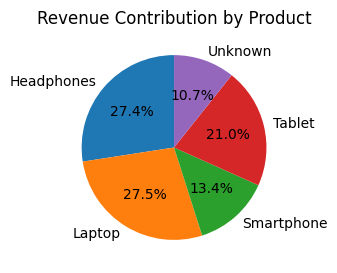

In [236]:
plt.figure(figsize=(5, 3))
plt.pie(prod_sale, labels=prod_sale.index, autopct="%1.1f%%", startangle=90)
plt.title("Revenue Contribution by Product")
plt.show()

"Laptop" and "Headphones" are the most sold products both performed nearly similar, "Tablet" performed good followed by "Smartphone" which generated some decent sales and the "Unknown" product had the least contribution in total revenue.

---



# **DISTRIBUTION ANALYSIS**

***DISTRIBUTION OF Price_per_Unit***

*DESCRIPTIVE STATS*

In [237]:
df["Price_per_Unit"].describe()

,Price_per_Unit
count,100.000000
mean,1051.270000
std,564.103877
min,56.000000
25%,587.750000
50%,1096.500000
75%,1463.250000
max,1980.000000


*SKEWNESS*

In [238]:
df["Price_per_Unit"].skew()

np.float64(-0.13225331633509468)

The Price_per_Unit distribution is approximately symmetric, with a very slight negative skew, indicating marginally more low-price outliers and no significant deviation from normality.

---



*OUTLIERS BY IQR(INTER QURATIC RANGE)*

In [239]:
Q1 = df["Price_per_Unit"].quantile(0.25)
Q3 = df["Price_per_Unit"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[
    (df["Price_per_Unit"] < Q1 - 1.5*IQR) |
    (df["Price_per_Unit"] > Q3 + 1.5*IQR)
]
outliers

,Order_ID,Product,Category,Quantity,Price_per_Unit,Total_Sale


Because the table is empty, No significant outliers were detected in the Price_per_Unit variable using the IQR method, indicating a stable and consistent pricing distribution.

---



*VISUAL REPRESENTATION*

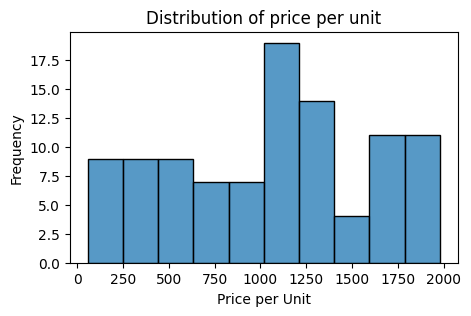

In [240]:
plt.figure(figsize=(5, 3))
sns.histplot(df["Price_per_Unit"], bins = 10)
plt.title("Distribution of price per unit")
plt.xlabel("Price per Unit")
plt.ylabel("Frequency")
plt.show()

1. The histogram shows how often different price ranges occur in the dataset.

2. Most prices fall within the mid-range, approximately between 800 and 1300, indicating that this is the most common price bracket of purchase by customers.

3. There are very few low-priced items (around 0–200), which means that cheap products are not so common to be bought.

4. There isn't a lot of skewness, but the data shows a slight right skew, with a long tail towards higher prices.

---



***DISTRIBUTION OF Quantity***

*DESCRIPTIVE STATS*

In [241]:
df["Quantity"].describe()

,Quantity
count,100.00000
mean,4.71000
std,2.71656
min,1.00000
25%,2.00000
50%,5.00000
75%,7.00000
max,9.00000


*Order Frequency*

In [242]:
df["Quantity"].value_counts()

,count
Quantity,
1.0,16
2.0,15
5.0,15
9.0,13
6.0,11
7.0,10
4.0,7
3.0,7
8.0,6


Most of the customers buy 1.0 unit of product in  one order and least number of customers buy 8.0 units of product in one order

---



*VISUAL REPRESENTATION*

Text(0.5, 1.0, 'Distribution of Quantity')

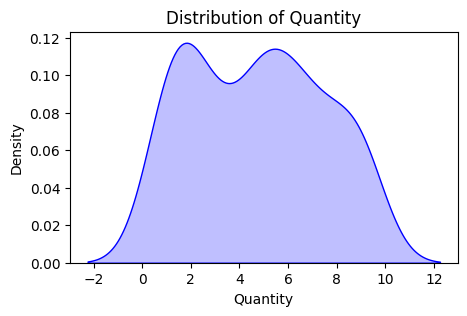

In [243]:
plt.figure(figsize=(5, 3))
sns.kdeplot(df["Quantity"], fill = True, color = "blue")
plt.title("Distribution of Quantity")


1. The KDE plot shows how the quantity values ​​are distributed in a smooth, continuous manner across the orders made by customers.

2. The peaks in the graph show the most common quantity values ​​(approximately 2-3 and 5-6), indicating that customers frequently make purchases within these ranges.

3. This curve slopes downwards towards both ends, meaning that very low and very high values ​​are less common.

4. This curve shows two peaks, which represent the order behavior of customers at different quantity levels (here bulk vs small orders).

---



***DISTRUBUTION OF Total_Sale***

*DESCRIPTIVE STATS*

In [244]:
df["Total_Sale"].describe()

,Total_Sale
count,100.000000
mean,5118.150000
std,4389.384809
min,63.000000
25%,1701.500000
50%,3787.500000
75%,7267.750000
max,17307.000000


*SKEWNESS*

In [245]:
df["Total_Sale"].skew()

np.float64(0.9264454373807867)

A skewness value of 0.93 indicates that the Total_Sale distribution is moderately positively skewed, meaning most values are concentrated on the lower side with a few high-value observations creating a right tail

---



*VISUAL REPRESENTATION*

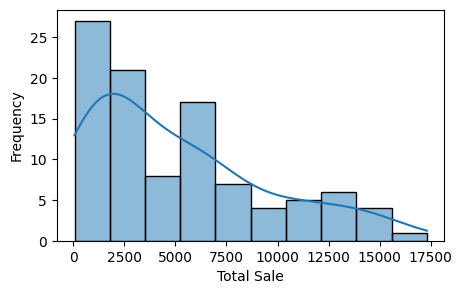

In [246]:
plt.figure(figsize = (5, 3))
sns.histplot(df["Total_Sale"], bins = 10, kde = True)
plt.xlabel("Total Sale")
plt.ylabel("Frequency")
plt.show()

1. The histogram bars show how often different total sales ranges occur, while the KDE curve shows the overall distribution trend.

2. Most of the total sales values ​​are at the lower end, between approximately 0 and 3000, which means most of the orders generate revenue between this range.

3. As total sales increase, the frequency gradually decreases, forming a long right tail.

4. The KDE curve confirms that the distribution is positively skewed (right-skewed), meaning that there are fewer sales at higher prices compared to sales at lower prices.

5. Very high total sales values ​​(over 10000) are rare, but they do occur and likely represent bulk purchases or high-priced items.

6. This plot shows unequal revenue contribution, where a small number of orders contribute a large portion of the total revenue.

---



# **FEATURE ENGINEERING**

# **ADDING PRICE RANGE and REVENUE BUCKET COLUMNS**

***PRICE RANGE COLUMN***

In [247]:
df["Price_per_Unit"].describe()
def pricerange(x):
  if x <= 500:
    return("Low")
  elif (x>500 and x<= 1500):
    return("Medium")
  else:
    return("High")

df["Price_Range"] = df["Price_per_Unit"].apply(pricerange)

***REVENUE BUCKET COLUMN***

In [248]:
df["Total_Sale"].describe()
df["Revenue_Bucket"] = df["Total_Sale"].apply(lambda x: "Low Revenue" if x <= 4000 else "Medium Revenue" if (x > 4000 and x <= 10000) else "High Revenue")

In [249]:
df.head()

,Order_ID,Product,Category,Quantity,Price_per_Unit,Total_Sale,Price_Range,Revenue_Bucket
0,1,Unknown,Unknown,2.0,1096.5,2193.0,Medium,Low Revenue
1,2,Laptop,Accessories,4.0,693.0,2772.0,Medium,Low Revenue
2,3,Headphones,Accessories,7.0,1626.0,11382.0,High,High Revenue
3,4,Smartphone,Electronics,6.0,63.0,378.0,Low,Low Revenue
4,5,Smartphone,Electronics,9.0,1097.0,9873.0,Medium,Medium Revenue


Text(0.5, 1.0, 'Relation between Price Range and Revenue Bucket')

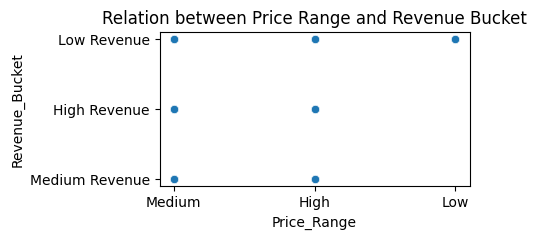

In [251]:
plt.figure(figsize = (4,2))
sns.scatterplot(x = df["Price_Range"], y = df["Revenue_Bucket"])
plt.title("Relation between Price Range and Revenue Bucket")

1. High-priced products appear in all three revenue buckets, meaning they can result in any revenue level depending on quantity sold.

2. Medium-priced products also span all revenue buckets.

3. Products in the low price range generated only low revenue.

4. Overall, high- and medium-priced products show greater variability in revenue generation, while low-priced products consistently result in low revenue.

---



# **FINAL BUSINESS SUMMARY :**

1. Accessories outperform electronics across all key metrics, including average price per unit, quantity sold, and total sales, making them the primary revenue driver in this dataset.

2. Higher sales volume combined with higher average pricing enables accessories to contribute more significantly to total revenue compared to electronics.

3. Pricing and quantity show a positive contribution for accessories, indicating strong customer demand even at relatively higher price points.

4. Revenue is concentrated heavily within the accessories category, suggesting that business performance is currently dependent on this category.

5. Electronics contribute comparatively lower revenue due to reduced sales volume, indicating potential opportunities for pricing strategy or demand improvement.

6. The best performing products are Laptop and Headphones in terms of sales contribution.

7. The products from Unknown Category can be completely discontinued and can be replaced from products from accessories or electronics category because they don't contribute much in the total Revenue .

8. Most of the revenue is generated through orders including low quantities and medium quantities with a small presence of high quantity orders.

9. Cheap products have the lowest contribution in the total revenue describing customer preference toward mid-to-high priced products.

10. The analysis highlights a clear opportunity to optimize product mix by focusing on high-performing accessories and improving the pricing or promotion strategy for electronics to balance revenue distribution across categories.




